In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt


import seaborn as sns


In [2]:
new_df = pd.DataFrame()
files = os.listdir('results')
for f in files:
    df = pd.read_csv(f'results/{f}')
    df = df.drop(columns = ['Unnamed: 0'])

    new_df = new_df.append(df,ignore_index=True)
    

In [ ]:
new_df_0 = pd.DataFrame(columns = new_df.columns)

for dataset in list(new_df['dataset'].unique()):
    for p in list(new_df['preprocessing'].unique()):

        df_aux = new_df[(new_df['dataset'] == dataset) & (new_df['preprocessing'] == p)].reset_index(drop = True)
        df_max = df_aux.iloc[df_aux['balanced_accuracy'].idxmax()]

        df_max['dataset'] = dataset
        df_max['preprocessing'] = p
        df_max['clf_type'] = 'Geral'
        df_max['params'] = 'Geral'

        new_df_0 = new_df_0.append(df_max,ignore_index=True)



In [ ]:
plt.figure(figsize=(15,8))

sns.lineplot(x="preprocessing", y="balanced_accuracy", hue="dataset", data=new_df_0)

In [ ]:
new_df_1 = pd.DataFrame(columns = new_df.columns)

for dataset in list(new_df['dataset'].unique()):
    for p in list(new_df['preprocessing'].unique()):

        df_aux = new_df[(new_df['dataset'] == dataset) & (new_df['preprocessing'] == p)].reset_index(drop = True)
        df_mean = df_aux.mean()

        df_mean['dataset'] = dataset
        df_mean['preprocessing'] = p
        df_mean['clf_type'] = 'Geral'
        df_mean['params'] = 'Geral'

        new_df_1 = new_df_1.append(df_mean,ignore_index=True)
    

In [ ]:

metrics = ['balanced_accuracy','dif_statistical_parity','dif_equal_opp','dif_avg_odds']


for m in metrics:

    plt.figure(figsize=(15,8))
    sns.barplot(x="dataset", y=m, hue="preprocessing", data=new_df_0).figure.savefig(f"img/barplot - {m}.png")
# plt.figure(figsize=(15,8))

# sns.lineplot(x="preprocessing", y="dif_statistical_parity", hue="dataset", data=new_df_1)

In [ ]:
metrics = ['balanced_accuracy','dif_statistical_parity','dif_equal_opp','dif_avg_odds']


for m in metrics:

    plt.figure(figsize=(15,8))
    sns.lineplot(x="dataset", y=m, hue="preprocessing", data=new_df_0).figure.savefig(f"img/lineplot - {m}.png")
# plt.figure(figsize=(15,8))

# sns.lineplot(x="preprocessing", y="dif_statistical_parity", hue="dataset", data=new_df_1)

In [3]:
new_df_2 = pd.DataFrame(columns = new_df.columns)

for dataset in list(new_df['dataset'].unique()):
    for p in list(new_df['preprocessing'].unique()):

        df_aux = new_df[(new_df['dataset'] == dataset) & (new_df['preprocessing'] == p)].reset_index(drop = True)
#         df_mean = df_aux.mean()

        df_aux['dataset'] = dataset
        df_aux['preprocessing'] = p
        new_df_2 = new_df_2.append(df_aux,ignore_index=True)

In [23]:
new_df_2.iloc[:,4:] = new_df_2.iloc[:,4:].abs()

In [ ]:
metrics = ['balanced_accuracy','dif_statistical_parity','dif_equal_opp','dif_avg_odds']

for m in metrics:

    plt.figure(figsize=(19,10))

    sns.boxplot(x="dataset", y=m, hue="preprocessing", data=new_df_2).figure.savefig(f"img/boxplot - {m}.png")


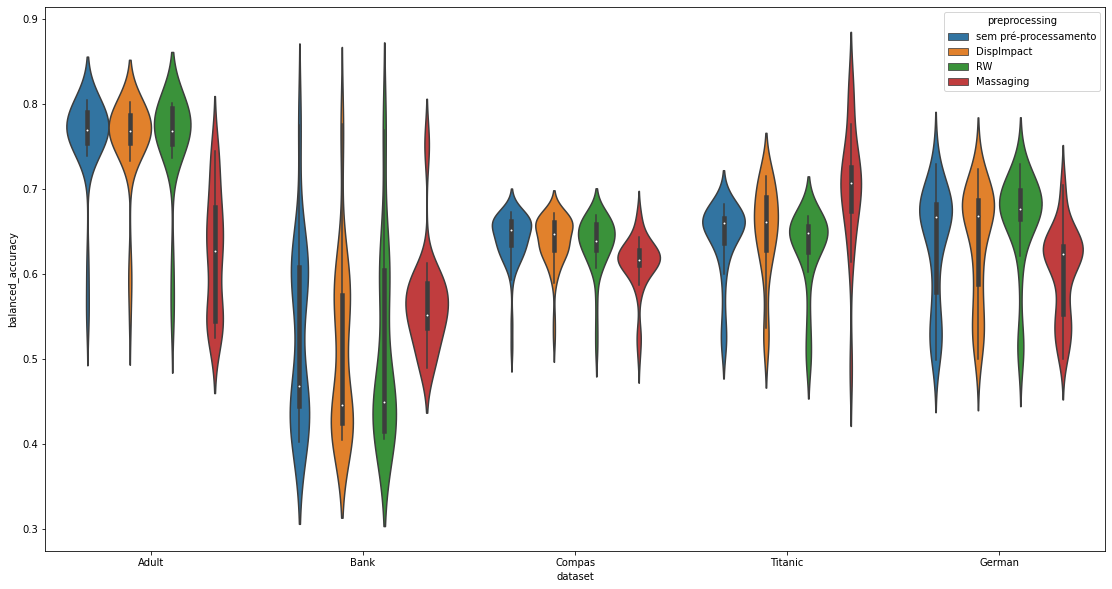

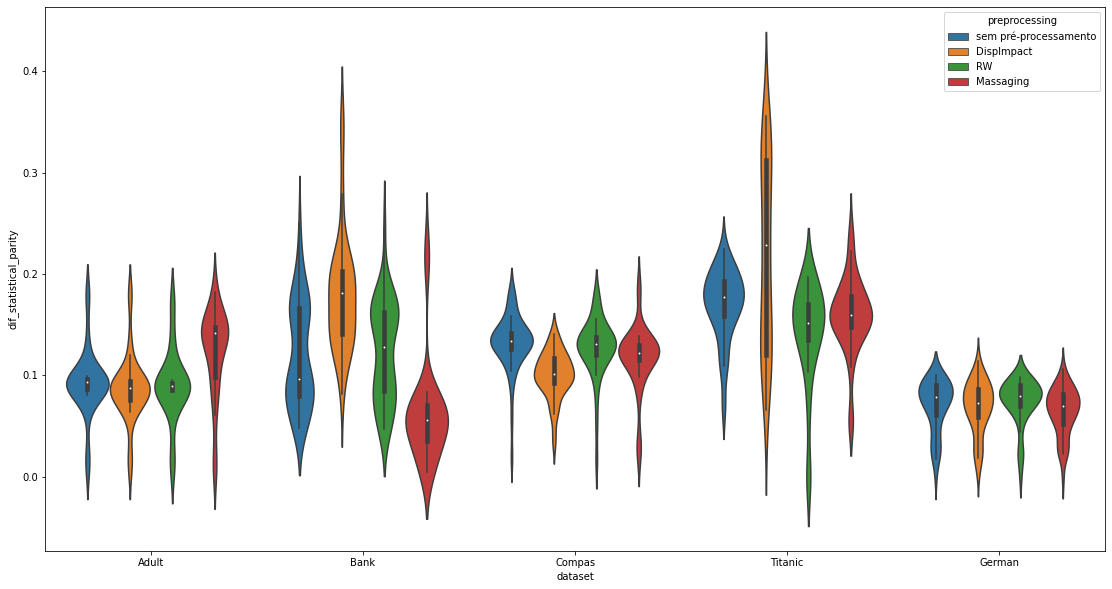

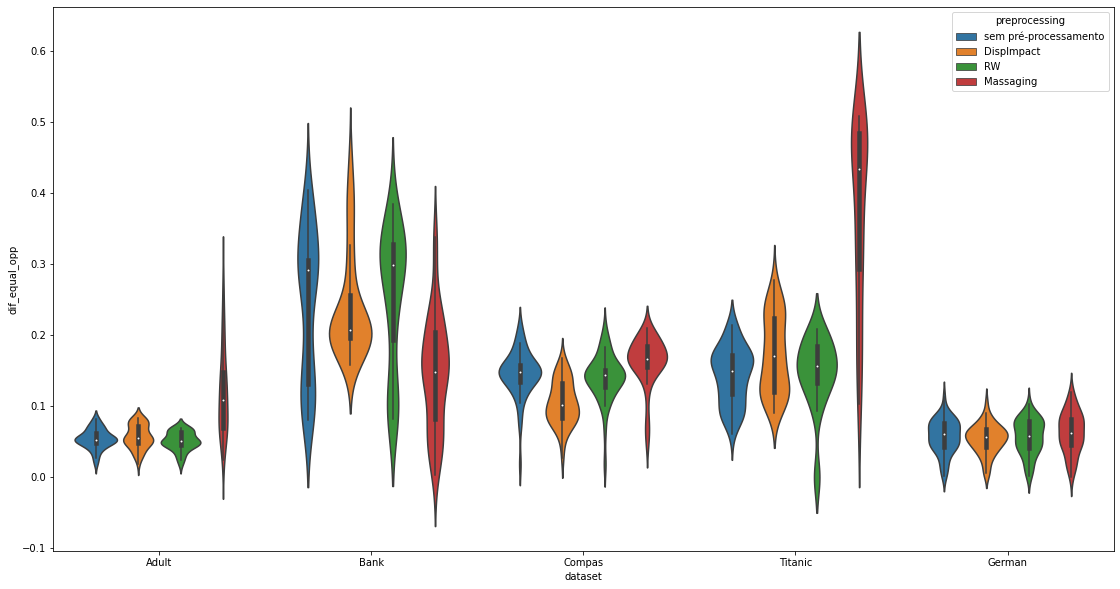

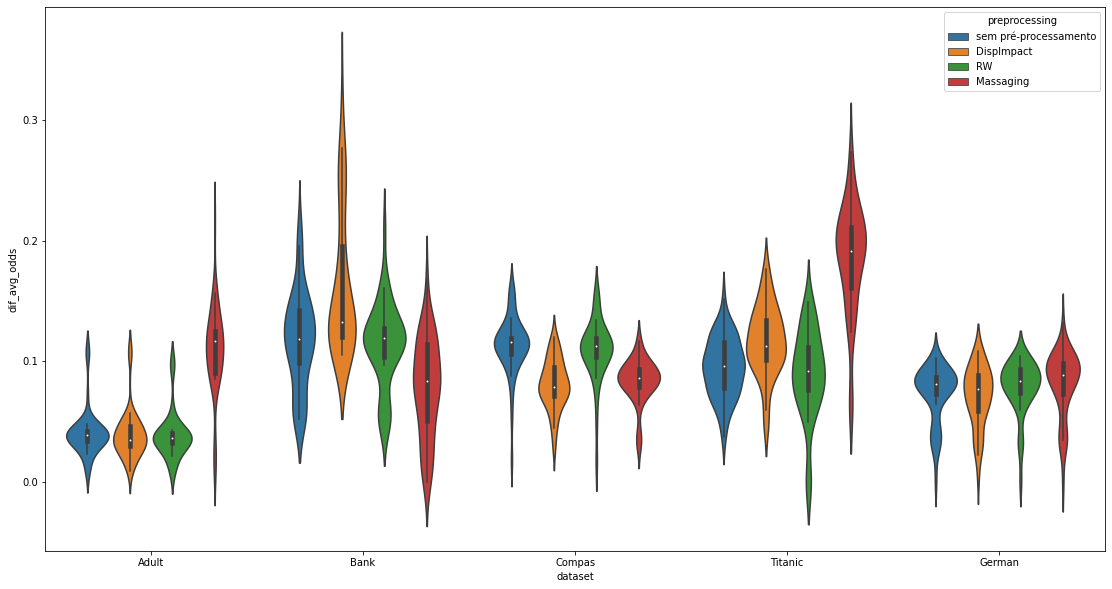

In [25]:
metrics = ['balanced_accuracy','dif_statistical_parity','dif_equal_opp','dif_avg_odds']

for m in metrics:

    plt.figure(figsize=(19,10))

    sns.violinplot(x="dataset", y=m, hue="preprocessing", data=new_df_2).figure.savefig(f"img/violinplot - {m}.png")


In [ ]:
new_df_2 = pd.DataFrame(columns = new_df.columns)


for p in list(new_df['preprocessing'].unique()):

    df_aux = new_df[(new_df['preprocessing'] == p)].reset_index(drop = True)
    
    df_mean = df_aux.iloc[df_aux['balanced_accuracy'].idxmax()]
    
#     print(df_aux.iloc[df_aux['balanced_accuracy'].idxmax()])

#     df_mean = df_aux.mean()

    df_mean['dataset'] = 'Geral'
    df_mean['preprocessing'] = p
    df_mean['clf_type'] = 'Geral'
    df_mean['params'] = 'Geral'

    new_df_2 = new_df_2.append(df_mean,ignore_index=True )


In [ ]:
def media_per_clf_type(df):
    
    new_df = pd.DataFrame(columns = df.columns)

    for dataset in list(df['dataset'].unique()):
        for p in list(df['preprocessing'].unique()):
            for clf in list(df['clf_type'].unique()):

                df_aux = df[(df['dataset'] == dataset) & (df['clf_type'] == clf) & (df['preprocessing'] == p)]
                df_mean = df_aux.mean()

                df_mean['dataset'] = dataset
                df_mean['preprocessing'] = p
                df_mean['clf_type'] = clf
                df_mean['params'] = 'Geral'


                new_df = new_df.append(df_mean,ignore_index=True )
    return new_df

def media_per_database(df):
    
    new_df_0 = pd.DataFrame(columns = df.columns)

    for dataset in list(df['dataset'].unique()):
        for p in list(df['preprocessing'].unique()):

            df_aux = df[(df['dataset'] == dataset) & (df['preprocessing'] == p)]
            df_mean = df_aux.mean()

            df_mean['dataset'] = dataset
            df_mean['preprocessing'] = p
            df_mean['clf_type'] = 'Geral'
            df_mean['params'] = 'Geral'

            new_df_0 = new_df_0.append(df_mean,ignore_index=True )
    return new_df_0

def media_per_preprocessing(df):
    new_df_1 = pd.DataFrame(columns = df.columns)


    for p in list(df['preprocessing'].unique()):

        df_aux = df[(df['preprocessing'] == p)]
        df_mean = df_aux.mean()

        df_mean['dataset'] = 'Geral'
        df_mean['preprocessing'] = p
        df_mean['clf_type'] = 'Geral'
        df_mean['params'] = 'Geral'

        new_df_1 = new_df_1.append(df_mean,ignore_index=True )


    return new_df_1

In [ ]:
new_df_1 = pd.DataFrame()

for dataset in list(new_df['dataset'].unique()):
    for clf in list(new_df['clf_type'].unique()):
#         for p in list(df[df['clf_type'] == clf]['params'].unique()):
        
#         df1 = df[(df['dataset'] == dataset) & (df['clf_type'] == clf) & (df['params'] == p) & (df['preprocessing'] == 'sem pré-processamento')]
#         df2 = df[(df['dataset'] == dataset) & (df['clf_type'] == clf) & (df['params'] == p) & (df['preprocessing'] == 'DispImpact')]
        
        df1 = new_df[(new_df['dataset'] == dataset) & (new_df['clf_type'] == clf) & (new_df['preprocessing'] == 'sem pré-processamento')]
        df2 = new_df[(new_df['dataset'] == dataset) & (new_df['clf_type'] == clf) & (new_df['preprocessing'] == 'DispImpact')]


        aux_df = df1.copy()

        for c in df.columns[5:]:

            aux_df[c]= list(df1[c])[0] - list(df2[c])[0]

        new_df_1 = new_df_1.append(aux_df)                
            

            
            

In [ ]:
new_df_1

In [ ]:
def style_negative(v, props=''):
    return props if v < 0 else None

s2 = new_df.iloc[:,5:].style.applymap(style_negative, props='color:red;')\
              .applymap(lambda v: 'opacity: 60%;' if (v < 0.009) and (v > -0.009) else None)

s2
# pd.concat([new_df.iloc[:,:5], s2], axis = 0)

## Gerar todos os resultados

In [ ]:
results = {}

files = os.listdir('resultados-por-metodo')
for f in files:
    
    df = pd.read_csv(f'resultados-por-metodo/{f}')
    df = df.drop(columns = ['Unnamed: 0'])
    
    txt = f.split('-')[0]
 
    new_df_0 = pd.DataFrame(columns = df.columns)

    for dataset in list(df['dataset'].unique()):
        for p in list(df['preprocessing'].unique()):

            df_aux = df[(df['dataset'] == dataset) & (df['preprocessing'] == p)].reset_index(drop = True)
            df_max = df_aux.iloc[df_aux['balanced_accuracy'].idxmax()]

            df_max['dataset'] = dataset
            df_max['preprocessing'] = p
            df_max['clf_type'] = 'Geral'
            df_max['params'] = 'Geral'

            new_df_0 = new_df_0.append(df_max,ignore_index=True)
            
            
            
    new_df_0.to_csv(f'analise_resultados/{txt}_per_dataset.csv')
    

In [ ]:
def max_per_preprocessing(df):

    new_df_1 = pd.DataFrame(columns = df.columns)

    for p in list(df['preprocessing'].unique()):

        df_aux = df[(df['preprocessing'] == p)].reset_index(drop = True)
        df_max = df_aux.iloc[df_aux['balanced_accuracy'].idxmax()]

        df_max['dataset'] = 'Geral'
        df_max['preprocessing'] = p
        df_max['clf_type'] = 'Geral'
        df_max['params'] = 'Geral'

        new_df_1 = new_df_1.append(df_max,ignore_index=True)
        
    return new_df_1

In [ ]:
# def max_per_database(df):
    
new_df_0 = pd.DataFrame(columns = df.columns)

for dataset in list(df['dataset'].unique()):
    for p in list(df['preprocessing'].unique()):

        df_aux = df[(df['dataset'] == dataset) & (df['preprocessing'] == p)].reset_index(drop = True)
        df_max = df_aux.iloc[df_aux['balanced_accuracy'].idxmax()]

        df_max['dataset'] = dataset
        df_max['preprocessing'] = p
        df_max['clf_type'] = 'Geral'
        df_max['params'] = 'Geral'

        new_df_0 = new_df_0.append(df_max,ignore_index=True)
            
#     return new_df_0

In [ ]:
new_df_0.to_csv('analise_resultados/mss_per_dataset.csv')

In [ ]:
sns.barplot(x="dataset", y="accuracy", hue="preprocessing", data=new_df_0)

In [ ]:
df_analises = pd.DataFrame()

files = os.listdir('analise_resultados')
for f in files:
    
    df = pd.read_csv(f'analise_resultados/{f}')
    df = df.drop(columns = ['Unnamed: 0'])

    df_analises = pd.concat([df,df_analises])
    
df_analises = df_analises.reset_index(drop=True)
df_analises = df_analises.drop_duplicates()

In [ ]:
plt.figure(figsize=(15,8))

sns.barplot(x="dataset", y="accuracy", hue="preprocessing", data=df_analises)

In [ ]:
plt.figure(figsize=(15,8))

sns.barplot(x="dataset", y="dif_statistical_parity", hue="preprocessing", data=df_analises)

In [ ]:
plt.figure(figsize=(15,8))

sns.barplot(x="dataset", y="disparate_impacto_ratio", hue="preprocessing", data=df_analises)

In [ ]:
plt.figure(figsize=(15,8))

sns.barplot(x="dataset", y="dif_equal_opp", hue="preprocessing", data=df_analises)

In [ ]:
np.arange(100, 600, 100)